# Probability of Beating the Cube without Card-Counting

In [36]:
from models import *
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

An example initialized cube game <br>
(A=Alive, D=Dead)

In [12]:
cube = Cube()
print(cube)

43 cards in deck
9 cards in cube
9 alive, 0 dead:

6 of Diamonds (A)      8 of Spades (A)        King of Clubs (A)      
5 of Hearts (A)        5 of Spades (A)        Queen of Hearts (A)    
2 of Clubs (A)         10 of Diamonds (A)     6 of Spades (A)        



Define some helper functionality

In [13]:
record_list = []


def record_simulation():
    record = dict()
    cube = Cube()
    while True:
        me = cube.get_most_extreme()
        if me[1].value > 8:
            cube.bet(me[0], higher=False)
        else:
            cube.bet(me[0], higher=True)
        if cube.life_count == 0:
            record['win'] = False
            break
        elif len(cube.deck) == 0:
            record['win'] = True
            break
    record['cards_left'] = len(cube.deck)
    return record

Run 1 million simulations

In [14]:
for i in range(1, 1000001):
    if i % 100000 == 0:
        tic = datetime.datetime.now()
        print(tic, f'Game {i:,.0f}')
    record_list.append(record_simulation())

2020-08-10 19:59:15.244753 Game 100,000
2020-08-10 19:59:37.017487 Game 200,000
2020-08-10 19:59:59.263795 Game 300,000
2020-08-10 20:00:20.957470 Game 400,000
2020-08-10 20:00:43.122591 Game 500,000
2020-08-10 20:01:04.905807 Game 600,000
2020-08-10 20:01:26.993808 Game 700,000
2020-08-10 20:01:49.134690 Game 800,000
2020-08-10 20:02:10.785087 Game 900,000
2020-08-10 20:02:32.364068 Game 1,000,000


In [18]:
df = pd.DataFrame(record_list)
win_rate = df['win'].sum() / len(df) * 100
ave_cards_left = df['cards_left'].mean()

print(f'Win Rate: {win_rate:.2f}%')
print(f'Average Cards Remaining: {ave_cards_left:.2f}')

Win Rate: 6.93%
Average Cards Remaining: 13.05


In [49]:
cards_left = df.groupby('cards_left')['cards_left'].count() / len(df)

Text(0, 0.5, 'Fraction of Games')

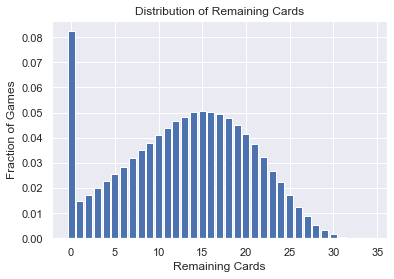

In [54]:
fig, ax = plt.subplots(1)
ax.bar(cards_left.index, cards_left.values)
ax.set_title('Distribution of Remaining Cards')
plt.xlabel('Remaining Cards')
plt.ylabel('Fraction of Games')

In [62]:
losses = df[~df['win']]
cards_left_lost = losses.groupby('cards_left')['cards_left'].count() / len(losses)

Text(0, 0.5, 'Fraction of Games')

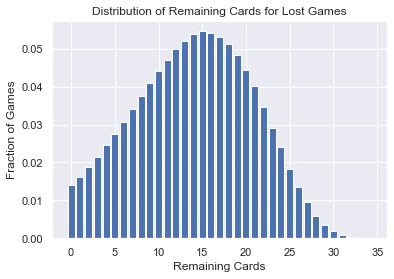

In [65]:
fig, ax = plt.subplots(1)
ax.bar(cards_left_lost.index, cards_left_lost.values)
ax.set_title('Distribution of Remaining Cards for Lost Games')
plt.xlabel('Remaining Cards')
plt.ylabel('Fraction of Games')